In [0]:
# import pandas as pd
# import numpy as np

# train = pd.read_csv('train_data.csv',index_col=0)
# train = train.iloc[:-2].drop(['X1','PRICE_VAR','year'],axis=1)
# train = pd.get_dummies(train, columns=['Sector'])
# cols = train.select_dtypes(exclude=['float']).columns
# train[cols] = train[cols].apply(pd.to_numeric, downcast='float', errors='coerce')

In [0]:
# trainp = (train
#      .pipe(lambda df: df.loc[:, df.dtypes.values != np.dtype('O')])  # drop str columns
#      .pipe(lambda df: df.loc[:, (df.isnull().sum(axis='rows') < 8000).where(lambda v: v).dropna().index.values])  # drop columns with greater than 10000 null values
#      .dropna()
# )
# print(trainp)

In [0]:
# # trainp=pd.get_dummies(train, columns=['Sector'])
# # trainp['PRICE_VAR'] = pd.to_numeric(trainp['PRICE_VAR'], errors='coerce')
# y = trainp['Class']
# X = trainp.drop(['Class'],axis=1)
# # X[X==np.inf]=np.nan
# # X.fillna(X.mean(), inplace=True)

In [0]:
# from sklearn.feature_selection import mutual_info_classif
# import matplotlib.pyplot as plt
# import seaborn as sns
# stock_mutual_information = mutual_info_classif(X, y)

# plt.subplots(1,figsize=(200,1))
# sns.heatmap(stock_mutual_information[:, np.newaxis].T, cmap='Blues', cbar=False, linewidths=1, annot=True)
# plt.yticks([], [])
# plt.gca().set_xticklabels(trainp.columns[1:], rotation=45, ha='right', fontsize=12)
# plt.suptitle("Stock Variable Importance (mutual_info_classif)", fontsize=18, y=1.2)
# plt.gcf().subplots_adjust(wspace=0.2)
# pass

In [0]:
# from sklearn.feature_selection import GenericUnivariateSelect
# trans = GenericUnivariateSelect(score_func=mutual_info_classif, mode='percentile',param=10)
# stock_X_trans = trans.fit_transform(X, y)
# print("We started with {0} features but retained only {1} of them!".format(X.shape[1] - 1, stock_X_trans.shape[1]))

In [0]:
# columns_retained_Select = X.columns[trans.get_support()].values
# list(pd.DataFrame(stock_X_trans, columns=columns_retained_Select).keys())

In [0]:
# from sklearn.tree import DecisionTreeClassifier

# clf = DecisionTreeClassifier()
# clf.fit(X, y)

# pd.Series(clf.feature_importances_, index=trainp.columns[1:]).plot.bar(color='steelblue', figsize=(50, 6))

In [0]:
# from sklearn.feature_selection import SelectFromModel

# clf = DecisionTreeClassifier()
# trans = SelectFromModel(clf, threshold='2*mean')
# stock1_X_trans = trans.fit_transform(X, y)
# print("We started with {0} features but retained only {1} of them!".format(X.shape[1] - 1, stock1_X_trans.shape[1]))

In [0]:
# columns_retained_FromMode = X.columns[trans.get_support()]
# pd.DataFrame(stock1_X_trans, columns=columns_retained_FromMode).keys()

In [0]:
# from sklearn.feature_selection import RFE

# clf = DecisionTreeClassifier()
# trans = RFE(clf, n_features_to_select=20)
# stock2_X_trans = trans.fit_transform(X, y)
# columns_retained_RFE = X.columns[trans.get_support()].values


In [0]:
# from sklearn.feature_selection import RFECV

# clf = DecisionTreeClassifier()
# trans = RFECV(clf)
# stock3_X_trans = trans.fit_transform(X, y)
# columns_retained_RFECV = X.columns[trans.get_support()].values
# len(columns_retained_RFECV)

In [0]:
# import itertools
# pairs = {}
# for (i, (a, b)) in enumerate(itertools.combinations([set(columns_retained_Select), set(columns_retained_FromMode)],2)):
#     pairs.update({str(i): len(a.difference(b))})
    
# print("Enumerating differences between  3!")
# list(pairs.values())

In [0]:
# # model used for feature importances
# import lightgbm as lgb

# # utility for early stopping with a validation set
# from sklearn.model_selection import train_test_split

# # visualizations
# import matplotlib.pyplot as plt
# import seaborn as sns

# # memory management
# import gc

# # utilities
# from itertools import chain

# class FeatureSelector():
#     """
#     Class for performing feature selection for machine learning or data preprocessing.
    
#     Implements five different methods to identify features for removal 
    
#         1. Find columns with a missing percentage greater than a specified threshold
#         2. Find columns with a single unique value
#         3. Find collinear variables with a correlation greater than a specified correlation coefficient
#         4. Find features with 0.0 feature importance from a gradient boosting machine (gbm)
#         5. Find low importance features that do not contribute to a specified cumulative feature importance from the gbm
        
#     Parameters
#     --------
#         data : dataframe
#             A dataset with observations in the rows and features in the columns
#         labels : array or series, default = None
#             Array of labels for training the machine learning model to find feature importances. These can be either binary labels
#             (if task is 'classification') or continuous targets (if task is 'regression').
#             If no labels are provided, then the feature importance based methods are not available.
        
#     Attributes
#     --------
    
#     ops : dict
#         Dictionary of operations run and features identified for removal
        
#     missing_stats : dataframe
#         The fraction of missing values for all features
    
#     record_missing : dataframe
#         The fraction of missing values for features with missing fraction above threshold
        
#     unique_stats : dataframe
#         Number of unique values for all features
    
#     record_single_unique : dataframe
#         Records the features that have a single unique value
        
#     corr_matrix : dataframe
#         All correlations between all features in the data
    
#     record_collinear : dataframe
#         Records the pairs of collinear variables with a correlation coefficient above the threshold
        
#     feature_importances : dataframe
#         All feature importances from the gradient boosting machine
    
#     record_zero_importance : dataframe
#         Records the zero importance features in the data according to the gbm
    
#     record_low_importance : dataframe
#         Records the lowest importance features not needed to reach the threshold of cumulative importance according to the gbm
    
    
#     Notes
#     --------
    
#         - All 5 operations can be run with the `identify_all` method.
#         - If using feature importances, one-hot encoding is used for categorical variables which creates new columns
    
#     """
    
#     def __init__(self, data, labels=None):
        
#         # Dataset and optional training labels
#         self.data = data
#         self.labels = labels

#         if labels is None:
#             print('No labels provided. Feature importance based methods are not available.')
        
#         self.base_features = list(data.columns)
#         self.one_hot_features = None
        
#         # Dataframes recording information about features to remove
#         self.record_missing = None
#         self.record_single_unique = None
#         self.record_collinear = None
#         self.record_zero_importance = None
#         self.record_low_importance = None
        
#         self.missing_stats = None
#         self.unique_stats = None
#         self.corr_matrix = None
#         self.feature_importances = None
        
#         # Dictionary to hold removal operations
#         self.ops = {}
        
#         self.one_hot_correlated = False
        
#     def identify_missing(self, missing_threshold):
#         """Find the features with a fraction of missing values above `missing_threshold`"""
        
#         self.missing_threshold = missing_threshold

#         # Calculate the fraction of missing in each column 
#         missing_series = self.data.isnull().sum() / self.data.shape[0]
#         self.missing_stats = pd.DataFrame(missing_series).rename(columns = {'index': 'feature', 0: 'missing_fraction'})

#         # Sort with highest number of missing values on top
#         self.missing_stats = self.missing_stats.sort_values('missing_fraction', ascending = False)

#         # Find the columns with a missing percentage above the threshold
#         record_missing = pd.DataFrame(missing_series[missing_series > missing_threshold]).reset_index().rename(columns = 
#                                                                                                                {'index': 'feature', 
#                                                                                                                 0: 'missing_fraction'})

#         to_drop = list(record_missing['feature'])

#         self.record_missing = record_missing
#         self.ops['missing'] = to_drop
        
#         print('%d features with greater than %0.2f missing values.\n' % (len(self.ops['missing']), self.missing_threshold))
        
#     def identify_single_unique(self):
#         """Finds features with only a single unique value. NaNs do not count as a unique value. """

#         # Calculate the unique counts in each column
#         unique_counts = self.data.nunique()
#         self.unique_stats = pd.DataFrame(unique_counts).rename(columns = {'index': 'feature', 0: 'nunique'})
#         self.unique_stats = self.unique_stats.sort_values('nunique', ascending = True)
        
#         # Find the columns with only one unique count
#         record_single_unique = pd.DataFrame(unique_counts[unique_counts == 1]).reset_index().rename(columns = {'index': 'feature', 
#                                                                                                                 0: 'nunique'})

#         to_drop = list(record_single_unique['feature'])
    
#         self.record_single_unique = record_single_unique
#         self.ops['single_unique'] = to_drop
        
#         print('%d features with a single unique value.\n' % len(self.ops['single_unique']))
    
#     def identify_collinear(self, correlation_threshold, one_hot=False):
#         """
#         Finds collinear features based on the correlation coefficient between features. 
#         For each pair of features with a correlation coefficient greather than `correlation_threshold`,
#         only one of the pair is identified for removal. 
#         Using code adapted from: https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/
        
#         Parameters
#         --------
#         correlation_threshold : float between 0 and 1
#             Value of the Pearson correlation cofficient for identifying correlation features
#         one_hot : boolean, default = False
#             Whether to one-hot encode the features before calculating the correlation coefficients
#         """
        
#         self.correlation_threshold = correlation_threshold
#         self.one_hot_correlated = one_hot
        
#          # Calculate the correlations between every column
#         if one_hot:
            
#             # One hot encoding
#             features = pd.get_dummies(self.data)
#             self.one_hot_features = [column for column in features.columns if column not in self.base_features]

#             # Add one hot encoded data to original data
#             self.data_all = pd.concat([features[self.one_hot_features], self.data], axis = 1)
            
#             corr_matrix = pd.get_dummies(features).corr()

#         else:
#             corr_matrix = self.data.corr()
        
#         self.corr_matrix = corr_matrix
    
#         # Extract the upper triangle of the correlation matrix
#         upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))
        
#         # Select the features with correlations above the threshold
#         # Need to use the absolute value
#         to_drop = [column for column in upper.columns if any(upper[column].abs() > correlation_threshold)]

#         # Dataframe to hold correlated pairs
#         record_collinear = pd.DataFrame(columns = ['drop_feature', 'corr_feature', 'corr_value'])

#         # Iterate through the columns to drop to record pairs of correlated features
#         for column in to_drop:

#             # Find the correlated features
#             corr_features = list(upper.index[upper[column].abs() > correlation_threshold])

#             # Find the correlated values
#             corr_values = list(upper[column][upper[column].abs() > correlation_threshold])
#             drop_features = [column for _ in range(len(corr_features))]    

#             # Record the information (need a temp df for now)
#             temp_df = pd.DataFrame.from_dict({'drop_feature': drop_features,
#                                              'corr_feature': corr_features,
#                                              'corr_value': corr_values})

#             # Add to dataframe
#             record_collinear = record_collinear.append(temp_df, ignore_index = True)

#         self.record_collinear = record_collinear
#         self.ops['collinear'] = to_drop
        
#         print('%d features with a correlation magnitude greater than %0.2f.\n' % (len(self.ops['collinear']), self.correlation_threshold))

#     def identify_zero_importance(self, task, eval_metric=None, 
#                                  n_iterations=10, early_stopping = True):
#         """
        
#         Identify the features with zero importance according to a gradient boosting machine.
#         The gbm can be trained with early stopping using a validation set to prevent overfitting. 
#         The feature importances are averaged over `n_iterations` to reduce variance. 
        
#         Uses the LightGBM implementation (http://lightgbm.readthedocs.io/en/latest/index.html)
#         Parameters 
#         --------
#         eval_metric : string
#             Evaluation metric to use for the gradient boosting machine for early stopping. Must be
#             provided if `early_stopping` is True
#         task : string
#             The machine learning task, either 'classification' or 'regression'
#         n_iterations : int, default = 10
#             Number of iterations to train the gradient boosting machine
            
#         early_stopping : boolean, default = True
#             Whether or not to use early stopping with a validation set when training
        
        
#         Notes
#         --------
        
#         - Features are one-hot encoded to handle the categorical variables before training.
#         - The gbm is not optimized for any particular task and might need some hyperparameter tuning
#         - Feature importances, including zero importance features, can change across runs
#         """

#         if early_stopping and eval_metric is None:
#             raise ValueError("""eval metric must be provided with early stopping. Examples include "auc" for classification or
#                              "l2" for regression.""")
            
#         if self.labels is None:
#             raise ValueError("No training labels provided.")
        
#         # One hot encoding
#         features = pd.get_dummies(self.data)
#         self.one_hot_features = [column for column in features.columns if column not in self.base_features]

#         # Add one hot encoded data to original data
#         self.data_all = pd.concat([features[self.one_hot_features], self.data], axis = 1)

#         # Extract feature names
#         feature_names = list(features.columns)

#         # Convert to np array
#         features = np.array(features)
#         labels = np.array(self.labels).reshape((-1, ))

#         # Empty array for feature importances
#         feature_importance_values = np.zeros(len(feature_names))
        
#         print('Training Gradient Boosting Model\n')
        
#         # Iterate through each fold
#         for _ in range(n_iterations):

#             if task == 'classification':
#                 model = lgb.LGBMClassifier(n_estimators=1000, learning_rate = 0.05, verbose = -1)

#             elif task == 'regression':
#                 model = lgb.LGBMRegressor(n_estimators=1000, learning_rate = 0.05, verbose = -1)

#             else:
#                 raise ValueError('Task must be either "classification" or "regression"')
                
#             # If training using early stopping need a validation set
#             if early_stopping:
                
#                 train_features, valid_features, train_labels, valid_labels = train_test_split(features, labels, test_size = 0.15, stratify=labels)

#                 # Train the model with early stopping
#                 model.fit(train_features, train_labels, eval_metric = eval_metric,
#                           eval_set = [(valid_features, valid_labels)],
#                           early_stopping_rounds = 100, verbose = -1)
                
#                 # Clean up memory
#                 gc.enable()
#                 del train_features, train_labels, valid_features, valid_labels
#                 gc.collect()
                
#             else:
#                 model.fit(features, labels)

#             # Record the feature importances
#             feature_importance_values += model.feature_importances_ / n_iterations

#         feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})

#         # Sort features according to importance
#         feature_importances = feature_importances.sort_values('importance', ascending = False).reset_index(drop = True)

#         # Normalize the feature importances to add up to one
#         feature_importances['normalized_importance'] = feature_importances['importance'] / feature_importances['importance'].sum()
#         feature_importances['cumulative_importance'] = np.cumsum(feature_importances['normalized_importance'])

#         # Extract the features with zero importance
#         record_zero_importance = feature_importances[feature_importances['importance'] == 0.0]
        
#         to_drop = list(record_zero_importance['feature'])

#         self.feature_importances = feature_importances
#         self.record_zero_importance = record_zero_importance
#         self.ops['zero_importance'] = to_drop
        
#         print('\n%d features with zero importance after one-hot encoding.\n' % len(self.ops['zero_importance']))
    
#     def identify_low_importance(self, cumulative_importance):
#         """
#         Finds the lowest importance features not needed to account for `cumulative_importance` fraction
#         of the total feature importance from the gradient boosting machine. As an example, if cumulative
#         importance is set to 0.95, this will retain only the most important features needed to 
#         reach 95% of the total feature importance. The identified features are those not needed.
#         Parameters
#         --------
#         cumulative_importance : float between 0 and 1
#             The fraction of cumulative importance to account for 
#         """

#         self.cumulative_importance = cumulative_importance
        
#         # The feature importances need to be calculated before running
#         if self.feature_importances is None:
#             raise NotImplementedError("""Feature importances have not yet been determined. 
#                                          Call the `identify_zero_importance` method first.""")
            
#         # Make sure most important features are on top
#         self.feature_importances = self.feature_importances.sort_values('cumulative_importance')

#         # Identify the features not needed to reach the cumulative_importance
#         record_low_importance = self.feature_importances[self.feature_importances['cumulative_importance'] > cumulative_importance]

#         to_drop = list(record_low_importance['feature'])

#         self.record_low_importance = record_low_importance
#         self.ops['low_importance'] = to_drop
    
#         print('%d features required for cumulative importance of %0.2f after one hot encoding.' % (len(self.feature_importances) -
#                                                                             len(self.record_low_importance), self.cumulative_importance))
#         print('%d features do not contribute to cumulative importance of %0.2f.\n' % (len(self.ops['low_importance']),
#                                                                                                self.cumulative_importance))
        
#     def identify_all(self, selection_params):
#         """
#         Use all five of the methods to identify features to remove.
        
#         Parameters
#         --------
            
#         selection_params : dict
#            Parameters to use in the five feature selection methhods.
#            Params must contain the keys ['missing_threshold', 'correlation_threshold', 'eval_metric', 'task', 'cumulative_importance']
        
#         """
        
#         # Check for all required parameters
#         for param in ['missing_threshold', 'correlation_threshold', 'eval_metric', 'task', 'cumulative_importance']:
#             if param not in selection_params.keys():
#                 raise ValueError('%s is a required parameter for this method.' % param)
        
#         # Implement each of the five methods
#         self.identify_missing(selection_params['missing_threshold'])
#         self.identify_single_unique()
#         self.identify_collinear(selection_params['correlation_threshold'])
#         self.identify_zero_importance(task = selection_params['task'], eval_metric = selection_params['eval_metric'])
#         self.identify_low_importance(selection_params['cumulative_importance'])
        
#         # Find the number of features identified to drop
#         self.all_identified = set(list(chain(*list(self.ops.values()))))
#         self.n_identified = len(self.all_identified)
        
#         print('%d total features out of %d identified for removal after one-hot encoding.\n' % (self.n_identified, 
#                                                                                                   self.data_all.shape[1]))
        
#     def check_removal(self, keep_one_hot=True):
        
#         """Check the identified features before removal. Returns a list of the unique features identified."""
        
#         self.all_identified = set(list(chain(*list(self.ops.values()))))
#         print('Total of %d features identified for removal' % len(self.all_identified))
        
#         if not keep_one_hot:
#             if self.one_hot_features is None:
#                 print('Data has not been one-hot encoded')
#             else:
#                 one_hot_to_remove = [x for x in self.one_hot_features if x not in self.all_identified]
#                 print('%d additional one-hot features can be removed' % len(one_hot_to_remove))
        
#         return list(self.all_identified)
        
    
#     def remove(self, methods, keep_one_hot = True):
#         """
#         Remove the features from the data according to the specified methods.
        
#         Parameters
#         --------
#             methods : 'all' or list of methods
#                 If methods == 'all', any methods that have identified features will be used
#                 Otherwise, only the specified methods will be used.
#                 Can be one of ['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance']
#             keep_one_hot : boolean, default = True
#                 Whether or not to keep one-hot encoded features
                
#         Return
#         --------
#             data : dataframe
#                 Dataframe with identified features removed
                
        
#         Notes 
#         --------
#             - If feature importances are used, the one-hot encoded columns will be added to the data (and then may be removed)
#             - Check the features that will be removed before transforming data!
        
#         """
        
        
#         features_to_drop = []
      
#         if methods == 'all':
            
#             # Need to use one-hot encoded data as well
#             data = self.data_all
                                          
#             print('{} methods have been run\n'.format(list(self.ops.keys())))
            
#             # Find the unique features to drop
#             features_to_drop = set(list(chain(*list(self.ops.values()))))
            
#         else:
#             # Need to use one-hot encoded data as well
#             if 'zero_importance' in methods or 'low_importance' in methods or self.one_hot_correlated:
#                 data = self.data_all
                
#             else:
#                 data = self.data
                
#             # Iterate through the specified methods
#             for method in methods:
                
#                 # Check to make sure the method has been run
#                 if method not in self.ops.keys():
#                     raise NotImplementedError('%s method has not been run' % method)
                    
#                 # Append the features identified for removal
#                 else:
#                     features_to_drop.append(self.ops[method])
        
#             # Find the unique features to drop
#             features_to_drop = set(list(chain(*features_to_drop)))
            
#         features_to_drop = list(features_to_drop)
            
#         if not keep_one_hot:
            
#             if self.one_hot_features is None:
#                 print('Data has not been one-hot encoded')
#             else:
                             
#                 features_to_drop = list(set(features_to_drop) | set(self.one_hot_features))
       
#         # Remove the features and return the data
#         data = data.drop(columns = features_to_drop)
#         self.removed_features = features_to_drop
        
#         if not keep_one_hot:
#         	print('Removed %d features including one-hot features.' % len(features_to_drop))
#         else:
#         	print('Removed %d features.' % len(features_to_drop))
        
#         return data
    
#     def plot_missing(self):
#         """Histogram of missing fraction in each feature"""
#         if self.record_missing is None:
#             raise NotImplementedError("Missing values have not been calculated. Run `identify_missing`")
        
#         self.reset_plot()
        
#         # Histogram of missing values
#         plt.style.use('seaborn-white')
#         plt.figure(figsize = (7, 5))
#         plt.hist(self.missing_stats['missing_fraction'], bins = np.linspace(0, 1, 11), edgecolor = 'k', color = 'red', linewidth = 1.5)
#         plt.xticks(np.linspace(0, 1, 11));
#         plt.xlabel('Missing Fraction', size = 14); plt.ylabel('Count of Features', size = 14); 
#         plt.title("Fraction of Missing Values Histogram", size = 16);
        
    
#     def plot_unique(self):
#         """Histogram of number of unique values in each feature"""
#         if self.record_single_unique is None:
#             raise NotImplementedError('Unique values have not been calculated. Run `identify_single_unique`')
        
#         self.reset_plot()

#         # Histogram of number of unique values
#         self.unique_stats.plot.hist(edgecolor = 'k', figsize = (7, 5))
#         plt.ylabel('Frequency', size = 14); plt.xlabel('Unique Values', size = 14); 
#         plt.title('Number of Unique Values Histogram', size = 16);
        
    
#     def plot_collinear(self, plot_all = False):
#         """
#         Heatmap of the correlation values. If plot_all = True plots all the correlations otherwise
#         plots only those features that have a correlation above the threshold
        
#         Notes
#         --------
#             - Not all of the plotted correlations are above the threshold because this plots
#             all the variables that have been idenfitied as having even one correlation above the threshold
#             - The features on the x-axis are those that will be removed. The features on the y-axis
#             are the correlated features with those on the x-axis
        
#         Code adapted from https://seaborn.pydata.org/examples/many_pairwise_correlations.html
#         """
        
#         if self.record_collinear is None:
#             raise NotImplementedError('Collinear features have not been idenfitied. Run `identify_collinear`.')
        
#         if plot_all:
#         	corr_matrix_plot = self.corr_matrix
#         	title = 'All Correlations'
        
#         else:
# 	        # Identify the correlations that were above the threshold
# 	        # columns (x-axis) are features to drop and rows (y_axis) are correlated pairs
# 	        corr_matrix_plot = self.corr_matrix.loc[list(set(self.record_collinear['corr_feature'])), 
# 	                                                list(set(self.record_collinear['drop_feature']))]

# 	        title = "Correlations Above Threshold"

       
#         f, ax = plt.subplots(figsize=(10, 8))
        
#         # Diverging colormap
#         cmap = sns.diverging_palette(220, 10, as_cmap=True)

#         # Draw the heatmap with a color bar
#         sns.heatmap(corr_matrix_plot, cmap=cmap, center=0,
#                     linewidths=.25, cbar_kws={"shrink": 0.6})

#         # Set the ylabels 
#         ax.set_yticks([x + 0.5 for x in list(range(corr_matrix_plot.shape[0]))])
#         ax.set_yticklabels(list(corr_matrix_plot.index), size = int(160 / corr_matrix_plot.shape[0]));

#         # Set the xlabels 
#         ax.set_xticks([x + 0.5 for x in list(range(corr_matrix_plot.shape[1]))])
#         ax.set_xticklabels(list(corr_matrix_plot.columns), size = int(160 / corr_matrix_plot.shape[1]));
#         plt.title(title, size = 14)
        
#     def plot_feature_importances(self, plot_n = 15, threshold = None):
#         """
#         Plots `plot_n` most important features and the cumulative importance of features.
#         If `threshold` is provided, prints the number of features needed to reach `threshold` cumulative importance.
#         Parameters
#         --------
        
#         plot_n : int, default = 15
#             Number of most important features to plot. Defaults to 15 or the maximum number of features whichever is smaller
        
#         threshold : float, between 0 and 1 default = None
#             Threshold for printing information about cumulative importances
#         """
        
#         if self.record_zero_importance is None:
#             raise NotImplementedError('Feature importances have not been determined. Run `idenfity_zero_importance`')
            
#         # Need to adjust number of features if greater than the features in the data
#         if plot_n > self.feature_importances.shape[0]:
#             plot_n = self.feature_importances.shape[0] - 1

#         self.reset_plot()
        
#         # Make a horizontal bar chart of feature importances
#         plt.figure(figsize = (10, 6))
#         ax = plt.subplot()

#         # Need to reverse the index to plot most important on top
#         # There might be a more efficient method to accomplish this
#         ax.barh(list(reversed(list(self.feature_importances.index[:plot_n]))), 
#                 self.feature_importances['normalized_importance'][:plot_n], 
#                 align = 'center', edgecolor = 'k')

#         # Set the yticks and labels
#         ax.set_yticks(list(reversed(list(self.feature_importances.index[:plot_n]))))
#         ax.set_yticklabels(self.feature_importances['feature'][:plot_n], size = 12)

#         # Plot labeling
#         plt.xlabel('Normalized Importance', size = 16); plt.title('Feature Importances', size = 18)
#         plt.show()

#         # Cumulative importance plot
#         plt.figure(figsize = (6, 4))
#         plt.plot(list(range(1, len(self.feature_importances) + 1)), self.feature_importances['cumulative_importance'], 'r-')
#         plt.xlabel('Number of Features', size = 14); plt.ylabel('Cumulative Importance', size = 14); 
#         plt.title('Cumulative Feature Importance', size = 16);

#         if threshold:

#             # Index of minimum number of features needed for cumulative importance threshold
#             # np.where returns the index so need to add 1 to have correct number
#             importance_index = np.min(np.where(self.feature_importances['cumulative_importance'] > threshold))
#             plt.vlines(x = importance_index + 1, ymin = 0, ymax = 1, linestyles='--', colors = 'blue')
#             plt.show();

#             print('%d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold))

#     def reset_plot(self):
#         plt.rcParams = plt.rcParamsDefault

In [0]:
# # fs = FeatureSelector()
# # fs.identify_collinear(X, 0.99)
# # fs.plot_collinear()
# # from feature_selector import FeatureSelector
# fs = FeatureSelector(data = X, labels = y)
# # fs.identify_missing(missing_threshold=0.6)
# # fs.identify_collinear(correlation_threshold=0.99)
# # fs.plot_collinear()

In [0]:
# fs.identify_zero_importance(task = 'classification', eval_metric = 'auc', 
#                             n_iterations = 10, early_stopping = True)

In [0]:
# fs.plot_feature_importances(threshold = 0.99)

In [0]:
# fs.identify_low_importance(cumulative_importance = 0.99)

In [0]:
# train_removed = fs.remove(methods = 'all')
# train_removed_all = fs.remove(methods = 'all', keep_one_hot=False)
# train_removed_all_once = fs.remove(methods = 'all', keep_one_hot = True)

In [18]:
# pandas and numpy for data manipulation
import pandas as pd
import numpy as np
train = pd.read_csv('train_data.csv',index_col=0)
train = train.iloc[:-2].drop(['X1','PRICE_VAR','year'],axis=1)
train = pd.get_dummies(train, columns=['Sector'])
cols = train.select_dtypes(exclude=['float']).columns
train[cols] = train[cols].apply(pd.to_numeric, downcast='float', errors='coerce')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,224,225,226) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, comp

In [0]:
test = pd.read_csv('test_data.csv',index_col=0)
test = test.iloc[:-2].drop(['X1','PRICE_VAR','year'],axis=1)
test = pd.get_dummies(test, columns=['Sector'])
cols1 = test.select_dtypes(exclude=['float']).columns
test[cols1] = test[cols1].apply(pd.to_numeric, downcast='float', errors='coerce')
# Match the columns in the dataframes
train, test = train.align(test, join = 'inner', axis = 1)

In [20]:
print('Training shape: ', train.shape)
print('Testing shape: ', test.shape)

Training shape:  (17688, 233)
Testing shape:  (4390, 233)


In [0]:
# train, test = train.align(test, join = 'inner', axis = 1)

# print('Training set full shape: ', train.shape)
# print('Testing set full shape: ' , test.shape)
train = (train
     .pipe(lambda df: df.loc[:, df.dtypes.values != np.dtype('O')])  # drop str columns
     .pipe(lambda df: df.loc[:, (df.isnull().sum(axis='rows') < 8000).where(lambda v: v).dropna().index.values])  # drop columns with greater than 10000 null values
     .dropna()
)
# print(trainp)
y=train['Class']
X=train.drop(['Class'],axis=1)
# X=train.fillna(0)
# y=y.fillna(0)

In [0]:
test = (test
     .pipe(lambda df: df.loc[:, df.dtypes.values != np.dtype('O')])  # drop str columns
     .pipe(lambda df: df.loc[:, (df.isnull().sum(axis='rows') < 8000).where(lambda v: v).dropna().index.values])  # drop columns with greater than 10000 null values
     .dropna()
)
train, test = train.align(test, join = 'inner', axis = 1)

In [23]:
# Threshold for removing correlated variables
threshold = 0.9

# Absolute value correlation matrix
corr_matrix = X.corr().abs()
# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove.' % (len(to_drop)))

X = X.drop(columns = to_drop)
test = test.drop(columns = to_drop)

print('Training shape: ', X.shape)
print('Testing shape: ', test.shape)

There are 69 columns to remove.
Training shape:  (17685, 163)
Testing shape:  (4390, 164)


In [0]:
# modeling 
import lightgbm as lgb
# Initialize an empty array to hold feature importances
feature_importances = np.zeros(X.shape[1])

# Create the model with several hyperparameters
model = lgb.LGBMClassifier(objective='binary', boosting_type = 'goss', n_estimators = 10000, class_weight = 'balanced')

In [25]:
# utilities
from sklearn.model_selection import train_test_split
# Fit the model twice to avoid overfitting
for i in range(2):
    
    # Split into training and validation set
    train_features, valid_features, train_y, valid_y = train_test_split(X, y, test_size = 0.25, random_state = i)
    
    # Train using early stopping
    model.fit(train_features, train_y, early_stopping_rounds=100, eval_set = [(valid_features, valid_y)], 
              eval_metric = 'auc', verbose = 200)
    
    # Record the feature importances
    feature_importances += model.feature_importances_

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[9]	valid_0's auc: 0.646039	valid_0's binary_logloss: 0.663267
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[11]	valid_0's auc: 0.6596	valid_0's binary_logloss: 0.659342


In [0]:
# Make sure to average feature importances! 
feature_importances = feature_importances / 2
feature_importances = pd.DataFrame({'feature': list(X.columns), 'importance': feature_importances}).sort_values('importance', ascending = False)

feature_importances.head()

In [27]:
# Find the features with zero importance
zero_features = list(feature_importances[feature_importances['importance'] == 0.0]['feature'])
print('There are %d features with 0.0 importance' % len(zero_features))
feature_importances.tail()

There are 22 features with 0.0 importance


,feature,importance
111,Net_Debt_to_EBITDA,0.0
21,Short-term_investments,0.0
134,3Y_Revenue_Growth_(per_Share),0.0
44,Investment_purchases_and_sales,0.0
81,cashConversionCycle,0.0


In [0]:
def plot_feature_importances(df, threshold = 0.9):
    """
    Plots 15 most important features and the cumulative importance of features.
    Prints the number of features needed to reach threshold cumulative importance.
    
    Parameters
    --------
    df : dataframe
        Dataframe of feature importances. Columns must be feature and importance
    threshold : float, default = 0.9
        Threshold for prining information about cumulative importances
        
    Return
    --------
    df : dataframe
        Dataframe ordered by feature importances with a normalized column (sums to 1)
        and a cumulative importance column
    
    """
    
    plt.rcParams['font.size'] = 18
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()

    # Cumulative importance plot
    plt.figure(figsize = (8, 6))
    plt.plot(list(range(len(df))), df['cumulative_importance'], 'r-')
    plt.xlabel('Number of Features'); plt.ylabel('Cumulative Importance'); 
    plt.title('Cumulative Feature Importance');
    plt.show();
    
    importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
    print('%d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold))
    
    return df


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


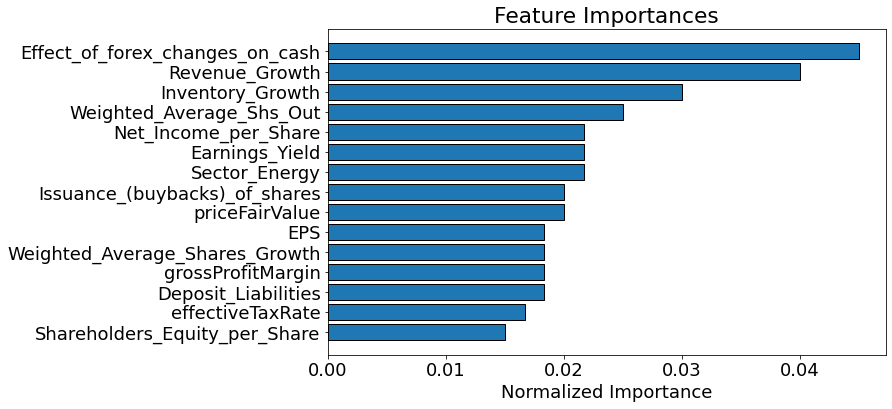

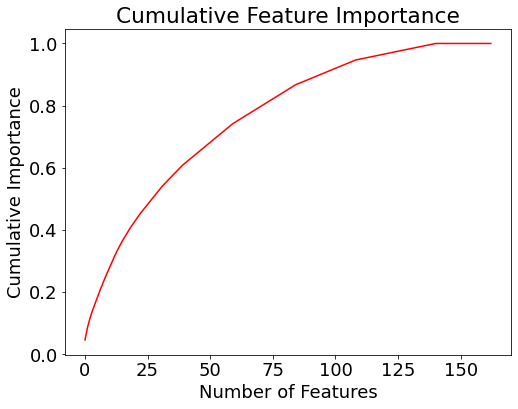

95 features required for 0.90 of cumulative importance


In [29]:
# matplotlit and seaborn for visualizations
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 22
import seaborn as sns

norm_feature_importances = plot_feature_importances(feature_importances)

In [30]:
X1 = X.drop(columns = zero_features)
test = test.drop(columns = zero_features)

print('Training shape: ', X1.shape)
print('Testing shape: ', test.shape)

Training shape:  (17685, 141)
Testing shape:  (4390, 142)


In [0]:
def identify_zero_importance_features(X1, y, iterations = 2):
    """
    Identify zero importance features in a training dataset based on the 
    feature importances from a gradient boosting model. 
    
    Parameters
    --------
    train : dataframe
        Training features
        
    train_labels : np.array
        Labels for training data
        
    iterations : integer, default = 2
        Number of cross validation splits to use for determining feature importances
    """
    
    # Initialize an empty array to hold feature importances
    feature_importances = np.zeros(X1.shape[1])

    # Create the model with several hyperparameters
    model = lgb.LGBMClassifier(objective='binary', boosting_type = 'goss', n_estimators = 10000, class_weight = 'balanced')
    
    # Fit the model multiple times to avoid overfitting
    for i in range(iterations):

        # Split into training and validation set
        train_features, valid_features, train_y, valid_y = train_test_split(X1, y, test_size = 0.25, random_state = i)

        # Train using early stopping
        model.fit(train_features, train_y, early_stopping_rounds=100, eval_set = [(valid_features, valid_y)], 
                  eval_metric = 'auc', verbose = 200)

        # Record the feature importances
        feature_importances += model.feature_importances_ / iterations
    
    feature_importances = pd.DataFrame({'feature': list(X1.columns), 'importance': feature_importances}).sort_values('importance', ascending = False)
    
    # Find the features with zero importance
    zero_features = list(feature_importances[feature_importances['importance'] == 0.0]['feature'])
    print('\nThere are %d features with 0.0 importance' % len(zero_features))
    
    return zero_features, feature_importances

In [32]:
second_round_zero_features, feature_importances = identify_zero_importance_features(X1, y)

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[9]	valid_0's auc: 0.646039	valid_0's binary_logloss: 0.663267
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[11]	valid_0's auc: 0.6596	valid_0's binary_logloss: 0.659342

There are 0 features with 0.0 importance


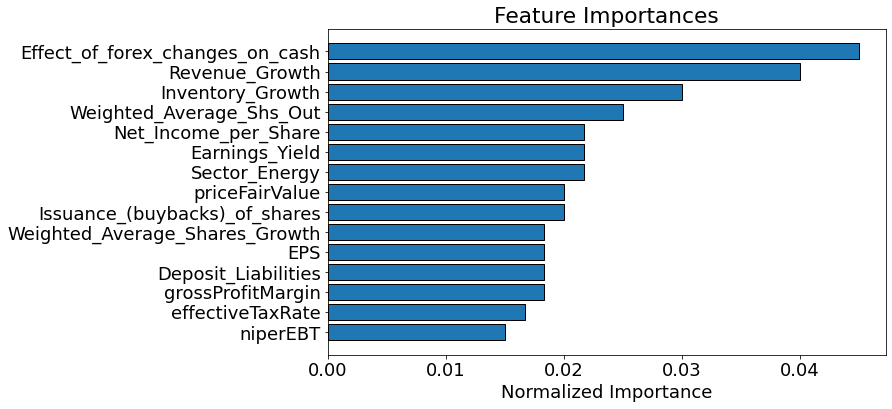

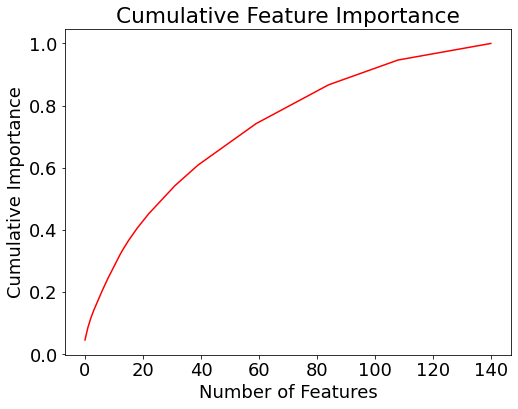

112 features required for 0.95 of cumulative importance


In [33]:
norm_feature_importances = plot_feature_importances(feature_importances, threshold = 0.95)

In [0]:
# Threshold for cumulative importance
threshold = 0.95

# Extract the features to keep
features_to_keep = list(norm_feature_importances[norm_feature_importances['cumulative_importance'] < threshold]['feature'])

# Create new datasets with smaller features
X_small = X1[features_to_keep]
test_small = test[features_to_keep]

In [0]:
def identify_zero_importance_features(X_small, y, iterations = 2):
    """
    Identify zero importance features in a training dataset based on the 
    feature importances from a gradient boosting model. 
    
    Parameters
    --------
    train : dataframe
        Training features
        
    train_labels : np.array
        Labels for training data
        
    iterations : integer, default = 2
        Number of cross validation splits to use for determining feature importances
    """
    
    # Initialize an empty array to hold feature importances
    feature_importances = np.zeros(X_small.shape[1])

    # Create the model with several hyperparameters
    model = lgb.LGBMClassifier(objective='binary', boosting_type = 'goss', n_estimators = 10000, class_weight = 'balanced')
    
    # Fit the model multiple times to avoid overfitting
    for i in range(iterations):

        # Split into training and validation set
        train_features, valid_features, train_y, valid_y = train_test_split(X_small, y, test_size = 0.25, random_state = i)

        # Train using early stopping
        model.fit(train_features, train_y, early_stopping_rounds=100, eval_set = [(valid_features, valid_y)], 
                  eval_metric = 'auc', verbose = 200)

        # Record the feature importances
        feature_importances += model.feature_importances_ / iterations
    
    feature_importances = pd.DataFrame({'feature': list(X_small.columns), 'importance': feature_importances}).sort_values('importance', ascending = False)
    
    # Find the features with zero importance
    zero_features = list(feature_importances[feature_importances['importance'] == 0.0]['feature'])
    print('\nThere are %d features with 0.0 importance' % len(zero_features))
    
    return zero_features, feature_importances

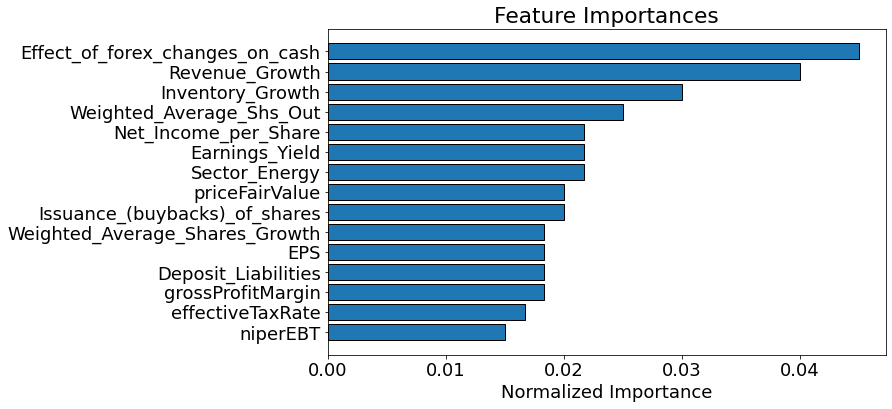

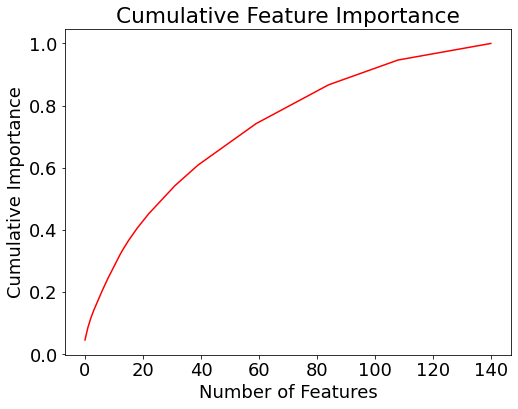

112 features required for 0.95 of cumulative importance


In [36]:
norm_feature_importances = plot_feature_importances(feature_importances, threshold = 0.95)

In [45]:
X_small = pd.DataFrame(X_small)
X_final = X_small.iloc[:,0:15]

import statsmodels.api as sm
logit_model=sm.Logit(y,X_final)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.689366
         Iterations 8
                                Results: Logit
Model:                    Logit                Pseudo R-squared:     0.005     
Dependent Variable:       Class                AIC:                  24390.8808
Date:                     2020-04-02 20:48     BIC:                  24422.0027
No. Observations:         17685                Log-Likelihood:       -12191.   
Df Model:                 3                    LL-Null:              -12250.   
Df Residuals:             17681                LLR p-value:          3.1199e-25
Converged:                1.0000               Scale:                1.0000    
No. Iterations:           8.0000                                               
-------------------------------------------------------------------------------
                                 Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------

In [56]:
cols2=['Sector_Energy','Issuance_(buybacks)_of_shares','grossProfitMargin']
x2=X_final[cols2]
logit_model2=sm.Logit(y,x2)
result2=logit_model2.fit()
print(result2.summary2())

Optimization terminated successfully.
         Current function value: 0.689796
         Iterations 6
                               Results: Logit
Model:                  Logit                Pseudo R-squared:     0.004     
Dependent Variable:     Class                AIC:                  24400.0710
Date:                   2020-04-02 21:03     BIC:                  24407.8514
No. Observations:       17685                Log-Likelihood:       -12199.   
Df Model:               0                    LL-Null:              -12250.   
Df Residuals:           17684                LLR p-value:          nan       
Converged:              1.0000               Scale:                1.0000    
No. Iterations:         6.0000                                               
-----------------------------------------------------------------------------
                               Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(x2, y)

In [53]:
cols=['Effect_of_forex_changes_on_cash','Revenue_Growth','effectiveTaxRate','Earnings_Yield','Inventory_Growth',
      'Weighted_Average_Shs_Out','priceFairValue','Weighted_Average_Shares_Growth','Net_Cash/Marketcap',
      'Net_Income_per_Share','Operating_Cash_Flow_growth','Issuance_(buybacks)_of_shares']
x=X_small[cols]
logit_model1=sm.Logit(y,x)
result1=logit_model1.fit()
print(result1.summary2())

Optimization terminated successfully.
         Current function value: 0.692501
         Iterations 8
                                Results: Logit
Model:                    Logit                Pseudo R-squared:     0.000     
Dependent Variable:       Class                AIC:                  24499.7725
Date:                     2020-04-02 20:59     BIC:                  24523.1139
No. Observations:         17685                Log-Likelihood:       -12247.   
Df Model:                 2                    LL-Null:              -12250.   
Df Residuals:             17682                LLR p-value:          0.043044  
Converged:                1.0000               Scale:                1.0000    
No. Iterations:           8.0000                                               
-------------------------------------------------------------------------------
                                 Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------